## Machine Learning - Supervised - Regression Models

### Dataset : RedWineQuality
### https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

**Input variables (based on physicochemical tests):**
* 1 - fixed acidity 
* 2 - volatile acidity
* 3 - citric acid
* 4 - residual sugar
* 5 - chlorides
* 6 - free sulfur dioxide
* 7 - total sulfur dioxide
* 8 - density
* 9 - pH
* 10 - sulphates
* 11 - alcohol

**Output variable (based on sensory data):**
* 12 - quality (score between 0 and 10)

In [2]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Import warning library
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Matplotlib for the visualization
%matplotlib inline

In [7]:
# Read the Red Wine quality dataset and display the set 
data_wine = pd.read_csv("winequalityred.csv")
data_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 1. Data Clearance

In [8]:
# Check the dtype
data_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
# Check the null values
data_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
# Check the dataset statistics
data_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
# Rename the columns
data_wine = data_wine.rename(columns = {'fixed acidity':'fixed_acidity', 'volatile acidity':'volatile_acidity', 'citric acid':'citric_acid', 
                               'residual sugar':'residual_sugar', 'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'})
data_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
# Numeric datatypes from dataset 
numeric_types = [numeric for numeric in data_wine.columns if data_wine[numeric].dtypes != 'O']
print(numeric_types)
print("Number of numeric datatypes in set:", len(numeric_types))

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
Number of numeric datatypes in set: 12


In [16]:
# Discrete datatypes from dataset
discrete_types = [discrete for discrete in numeric_types if len(data_wine[discrete].unique())<=25]
print(discrete_types)
print("Number of discrete datatypes in set:", len(discrete_types))

['quality']
Length of discrete datatypes in set: 1


In [18]:
# Continuous datatypes from dataset
continuous_types = [continuous for continuous in numeric_types if continuous not in discrete_types]
print(continuous_types)
print("Number of continuous datatypes in set:", len(continuous_types))             

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Number of continuous datatypes in set: 11


In [19]:
# Categorical datatypes from dataset
# There is not categorical datatype
categorical_types = [cat for cat in data_wine.columns
                     if data_wine[cat].dtypes == 'O']
print(categorical_types)
print("Number of categorical datatypes in set:", len(categorical_types))

[]
Number of categorical datatypes in set: 0


In [21]:
data_wine.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## 2. Data Visualization

<Axes: >

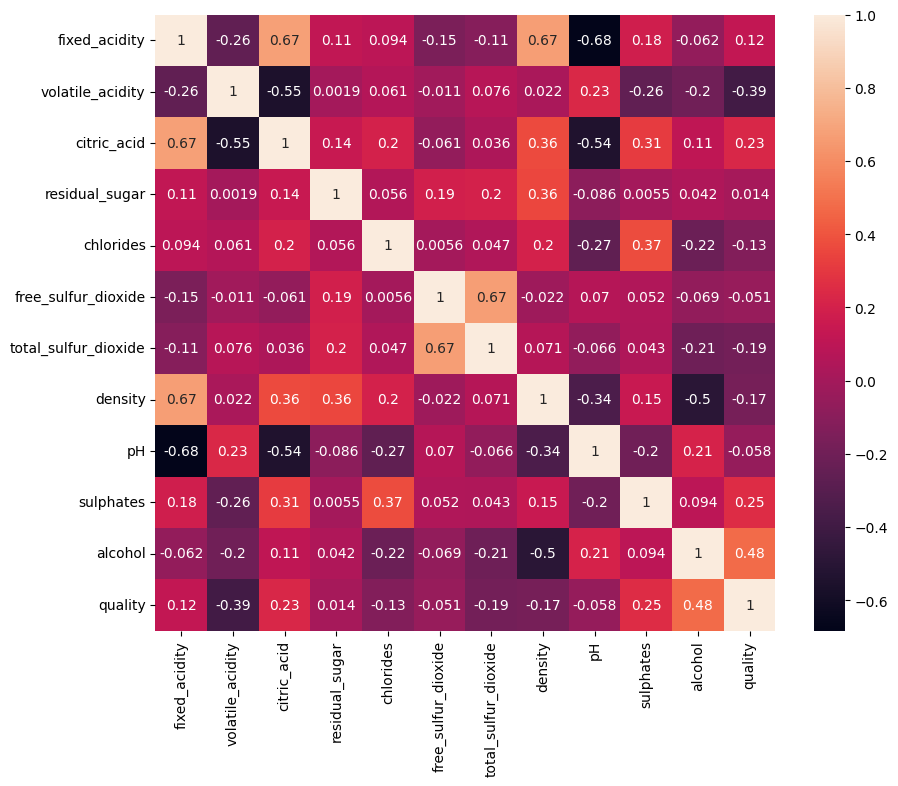

In [22]:
# Check for the correlations
correlation_matrix = data_wine.corr()
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, annot = True)

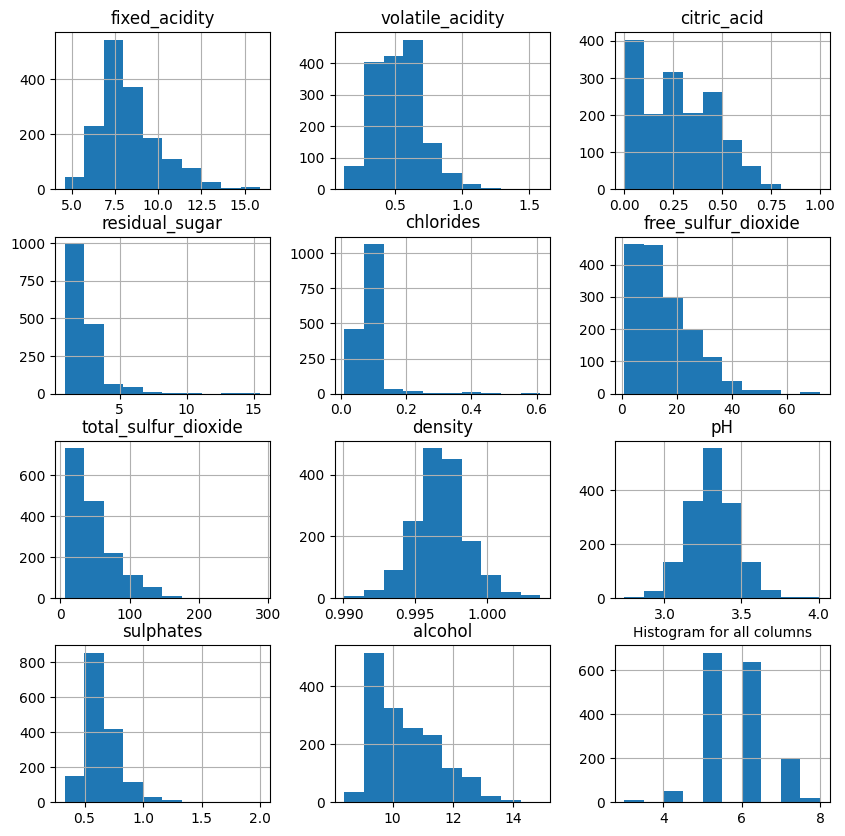

In [26]:
# Distributions for the dataset
data_wine.hist(figsize = (10,10), bins = 10)
plt.title("Histogram for all columns", fontsize = 10)
plt.show()

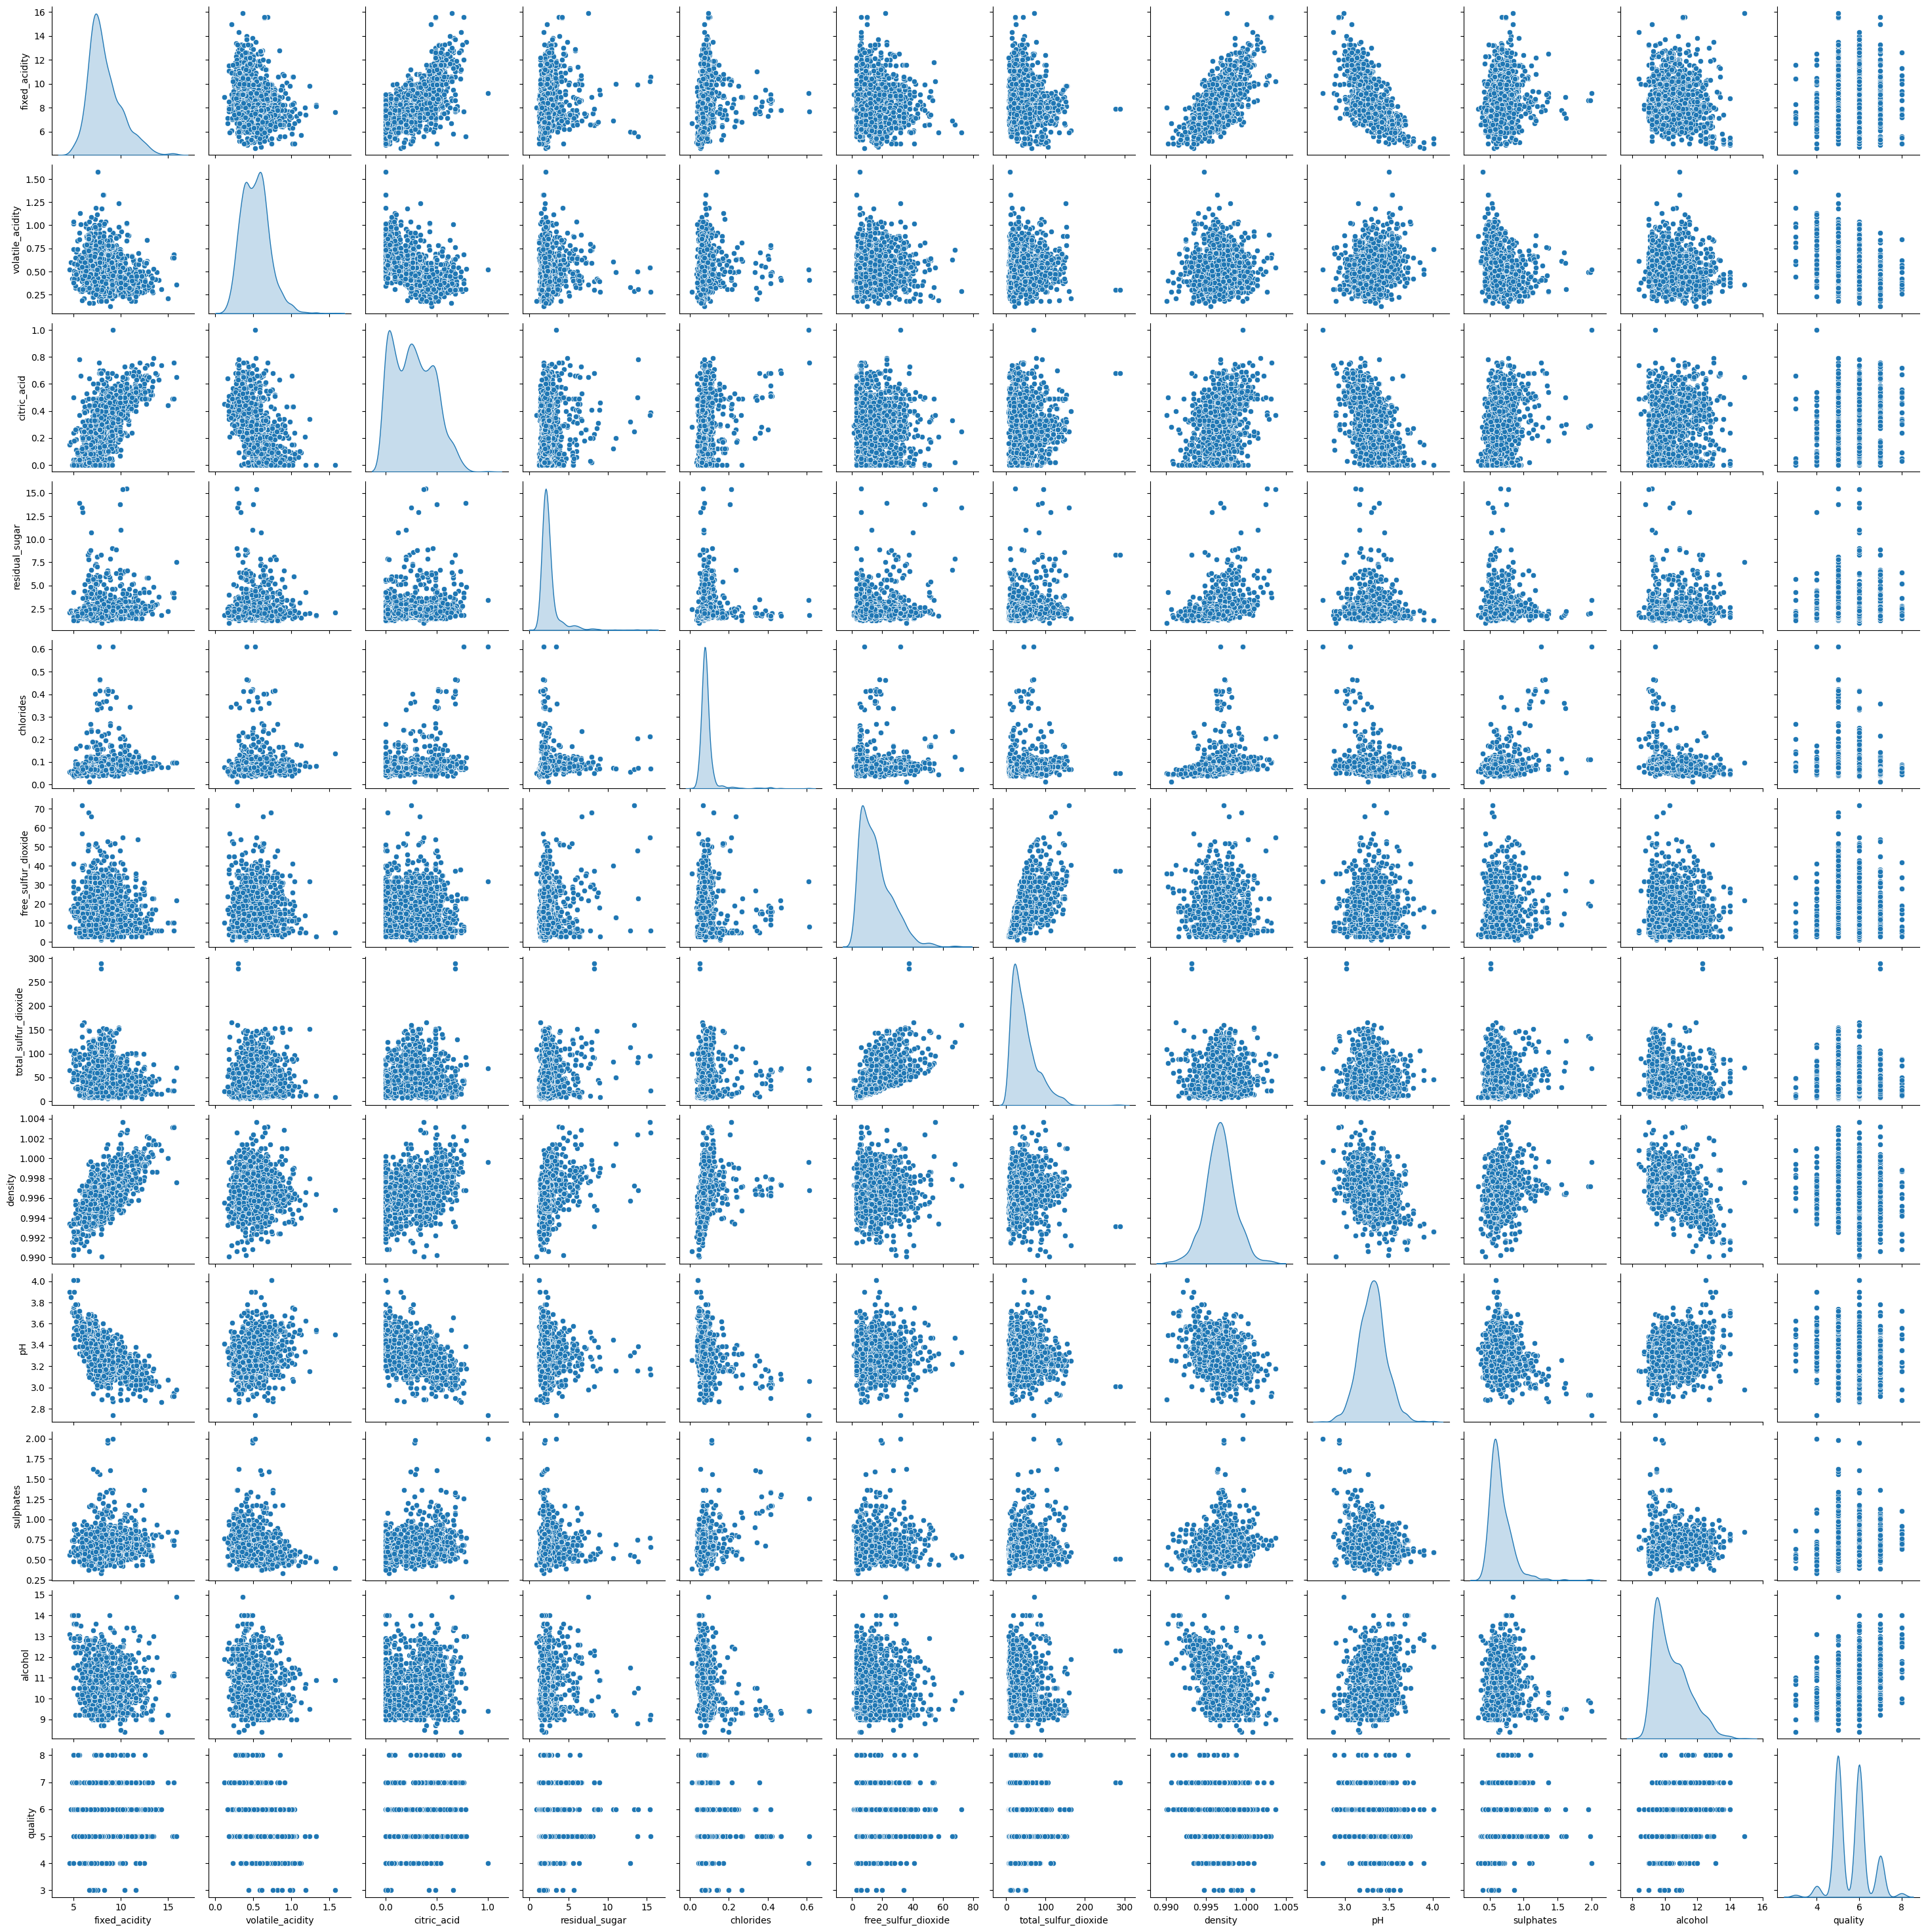

In [27]:
# Pairplots for the dataset
sns.pairplot(data_wine, diag_kind='kde')
plt.show()

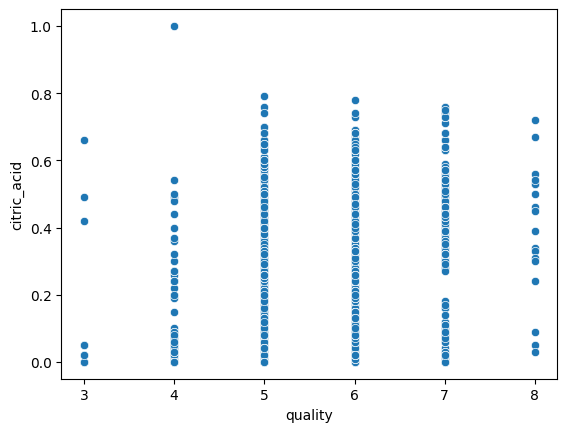

In [30]:
# Scatter plots
sns.scatterplot(data = data_wine, x = 'quality', y = 'citric_acid')
plt.show()

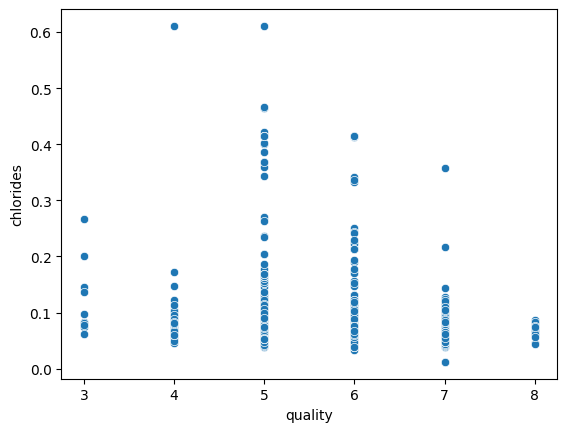

In [31]:
sns.scatterplot(data = data_wine, x = 'quality', y = 'chlorides')
plt.show()

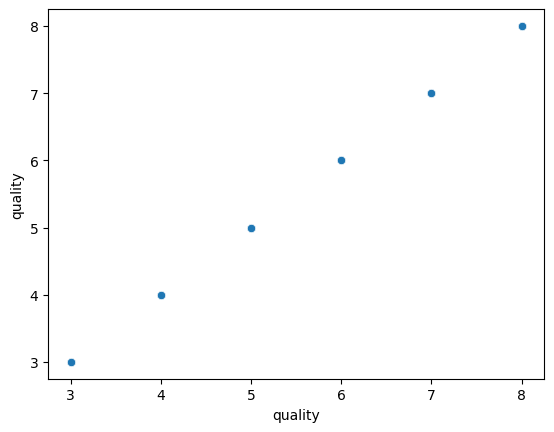

In [32]:
sns.scatterplot(data = data_wine, x = 'quality', y = 'quality')
plt.show()

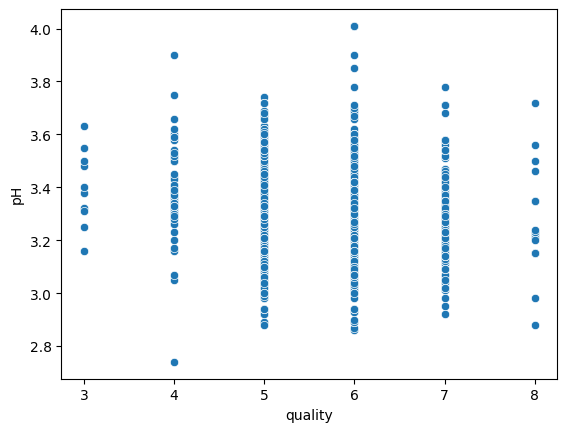

In [33]:
sns.scatterplot(data = data_wine, x = 'quality', y = 'pH')
plt.show()

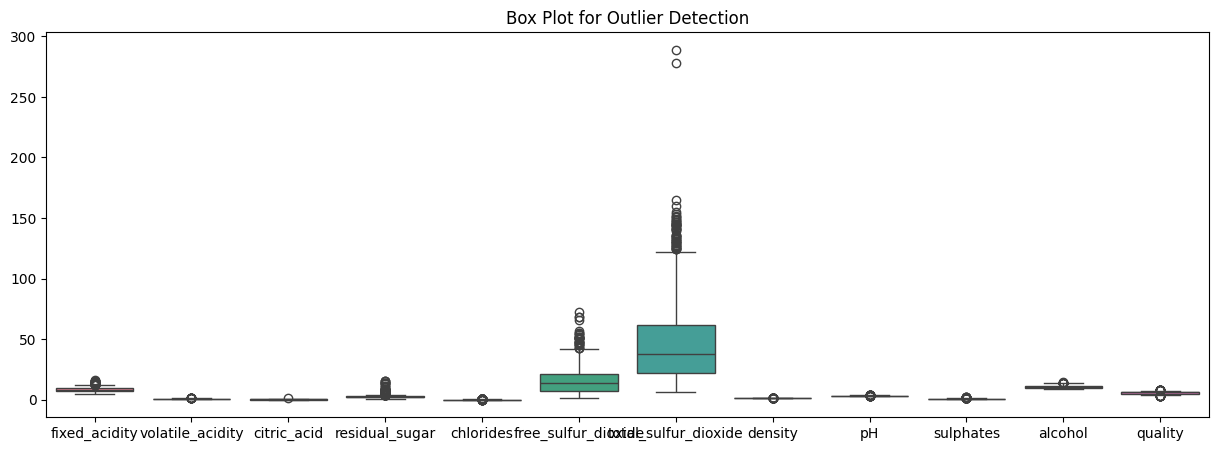

In [36]:
# Check for the Outliers
plt.figure(figsize = (15, 5))
sns.boxplot(data = data_wine)
plt.title("Box Plot for Outlier Detection")
plt.show()

## 3. Feature/Independent and Target/Dependent Splits

In [37]:
# Feature Split
x_feature = data_wine.drop('quality', axis = 1).values
x_feature

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]],
      shape=(1599, 11))

In [38]:
# Target
y_target = data_wine['quality'].values
y_target

array([5, 5, 5, ..., 6, 5, 6], shape=(1599,))

## 4. Train and Test Split

In [39]:
# Import the library
from sklearn.model_selection import train_test_split

In [40]:
# Split the train and test set
x_train, x_test, y_train, y_test = train_test_split(x_feature, y_target, test_size = 0.25, random_state = 42)

In [42]:
# Training and testing features set
print("Training feature set:", x_train)
print("-----------------------------------------------------------------------")
print("Testing feature set:", x_test)

Training set: [[11.7   0.49  0.49 ...  3.19  0.43  9.2 ]
 [ 8.8   0.6   0.29 ...  3.36  0.49  9.1 ]
 [ 7.1   0.59  0.   ...  3.42  0.55 11.5 ]
 ...
 [ 7.2   0.62  0.06 ...  3.51  0.54  9.5 ]
 [ 7.9   0.2   0.35 ...  3.32  0.8  11.9 ]
 [ 5.8   0.29  0.26 ...  3.39  0.54 13.5 ]]
-----------------------------------------------------------------------
Testing set: [[ 7.7   0.56  0.08 ...  3.24  0.66  9.6 ]
 [ 7.8   0.5   0.17 ...  3.39  0.48  9.5 ]
 [10.7   0.67  0.22 ...  3.28  0.98  9.9 ]
 ...
 [ 7.1   0.6   0.   ...  3.47  0.7   9.9 ]
 [ 7.8   0.62  0.05 ...  3.29  0.63  9.3 ]
 [10.6   0.36  0.57 ...  3.14  0.72 11.1 ]]


In [41]:
# Check the length of trian and test set
print("Length of training set:", len(x_train))
print("Length of testing set:", len(x_test))

Length of training set: 1199
Length of testing set: 400


## 5. Scaling

In [43]:
# Standardization the features
# Import the library
# Define the standardscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [46]:
# Training and Testing set
print("Training feature set after scaling:", x_train)
print("------------------------------------------------------------------------------------------------")
print("Testing feature set after scaling:", x_test)

Training feature set after scaling: [[ 1.97418149 -0.23260309  1.11458849 ... -0.78641859 -1.3131938
  -1.15257747]
 [ 0.28189382  0.37802632  0.09088663 ...  0.3161036  -0.97064635
  -1.24703683]
 [-0.71013687  0.32251456 -1.39348108 ...  0.70522908 -0.62809889
   1.01998773]
 ...
 [-0.65178213  0.48904985 -1.08637052 ...  1.28891729 -0.68519014
  -0.8691994 ]
 [-0.2432989  -1.84244427  0.39799719 ...  0.05668661  0.79918216
   1.39782516]
 [-1.46874859 -1.34283839 -0.06266865 ...  0.51066634 -0.68519014
   2.90917487]]
------------------------------------------------------------------------------------------------
Testing feature set after scaling: [[-0.34515185  0.25381745 -0.97086479 ... -0.45663065  0.04935995
  -0.76620052]
 [-0.29016948 -0.08908257 -0.50404053 ...  0.51251824 -1.14322934
  -0.85836116]
 [ 1.30431937  0.88246748 -0.24469372 ... -0.19819095  2.16951867
  -0.4897186 ]
 ...
 [-0.6750461   0.48241746 -1.38581969 ...  1.02939765  0.31437979
  -0.4897186 ]
 [-0.2901694

## 6. Import the Models
## (1) Linear Regression

In [50]:
# Import the Regression library and define the function
from sklearn.linear_model import LinearRegression
linregression = LinearRegression()
linregression.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [55]:
# Find the Linear Regression Intercept
intercept = linregression.intercept_
print("The intercept for the model is:", intercept)

The intercept for the model is: 5.627189324437035


In [56]:
# Coefficient for the Linear Regression model
coefficient = linregression.coef_
print("Coefficients for the model:", coefficient)

Coefficients for the model: [ 0.03746059 -0.18170837 -0.02616077  0.01250312 -0.08661258  0.05133664
 -0.12063671 -0.02987597 -0.05303269  0.14359811  0.30301729]


In [57]:
# Check for the Linear Regression training score
linear_regression_training_score = linregression.score(x_train, y_train)
print("Linear Regression Training score:", linear_regression_training_score)

Linear Regression Training score: 0.35485287452056624


In [66]:
# Predict the values using x_test
# Length of predicted values
y_pred = linregression.predict(x_test)
print("Length of the prediction values:", len(y_pred))
print(y_pred)

Length of the prediction values: 400
[5.31097365 5.01596677 5.64085949 5.41380443 5.7150253  5.23628231
 4.98926744 5.0900127  5.75473984 5.69139319 6.09991507 5.23240836
 5.54481165 5.22875342 5.42381598 6.46526932 5.11384567 5.5556251
 6.57410958 5.30120807 5.35911154 5.17088745 5.9495647  6.36317224
 5.33696639 5.42628061 6.33504199 5.33281278 5.14980893 6.18370649
 5.22274872 5.49558217 5.7538562  5.35123848 5.44533288 4.9861734
 6.19769498 5.71118889 5.60460351 6.16915383 5.47819458 5.20815496
 6.17533048 5.12891991 5.8638207  5.83227003 6.44960179 5.57057642
 5.11163171 5.5493215  5.13362823 4.98760386 5.55877228 6.3854841
 4.94065702 4.94746528 6.02633431 5.40646362 5.8269949  5.24478852
 5.57930708 5.9491546  5.25412583 5.29726057 6.48067392 5.38707475
 6.33537697 5.25277579 6.44750347 5.27679532 6.41551037 4.70971695
 5.7990893  5.81637902 6.17271887 5.25920813 6.79135504 5.87165831
 6.08950333 6.45763448 5.29044235 6.4506497  5.42929183 5.66358813
 5.69544941 6.38528535 5.269

In [65]:
# Import the metrics libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Find the loss functions
mse = mean_squared_error(y_test, y_pred)
print("Mean Square Error:", mse)

mae = mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:", mae)

rmse = np.sqrt(mse)
print("Root of Mean Square Error:", rmse)

score = r2_score(y_test, y_pred)
print("R2 Score:", score)

Mean Square Error: 0.3869293417436569
Mean Absolute Error: 0.4958639821964311
Root of Mean Square Error: 0.6220364472791421
R2 Score: 0.37450169558994595


In [67]:
# Find the adjusted r2 score
adjustedr2 = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adjusted R2:", adjustedr2)

Adjusted R2: 0.3567684962381146


In [68]:
# OLS Linear Regression summary
import statsmodels.api as sm
model = sm.OLS(y_train, x_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.007
Model:                            OLS   Adj. R-squared (uncentered):             -0.002
Method:                 Least Squares   F-statistic:                             0.7912
Date:                Fri, 02 Jan 2026   Prob (F-statistic):                       0.649
Time:                        21:57:22   Log-Likelihood:                         -3780.7
No. Observations:                1199   AIC:                                      7583.
Df Residuals:                    1188   BIC:                                      7639.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### -------------------------------------  End of Linear Regression   --------------------------------------------

## (2) Decision Tree Regression

In [69]:
# Import the library and define the function
from sklearn.tree import DecisionTreeRegressor
dtregression = DecisionTreeRegressor()
dtregression.fit(x_train, y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max

Text(0.5, 1.0, 'Decision Tree Regression')

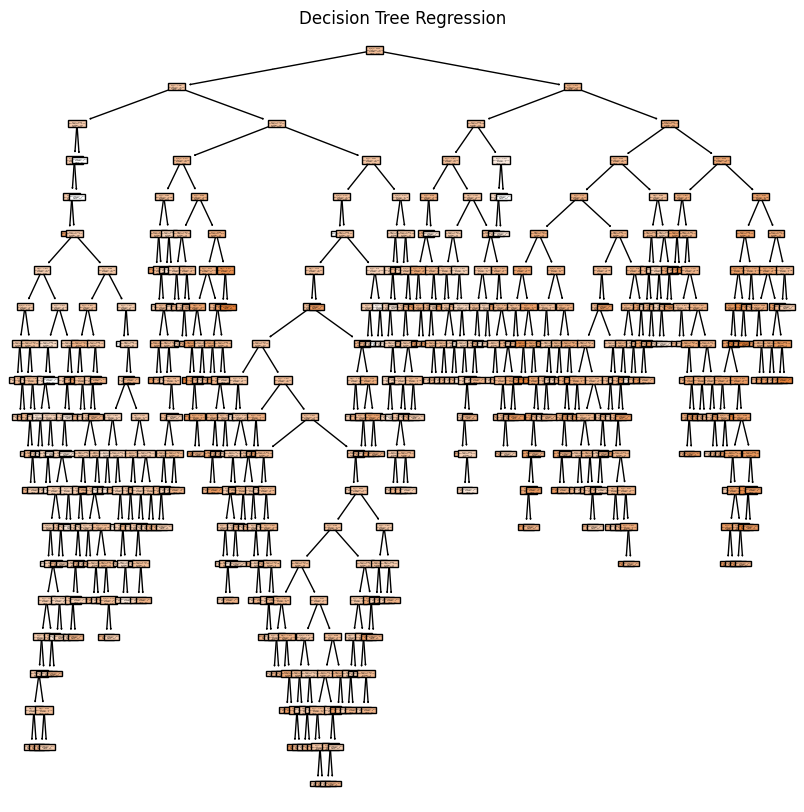

In [72]:
# Visualize the Decision Tree
from sklearn import tree
plt.figure(figsize = (10,10))
tree.plot_tree(dtregression, filled = True)
plt.title("Decision Tree Regression")

In [79]:
# Predict the values
y_dt_pred = dtregression.predict(x_test)
print("Length of the prediction values:", len(y_dt_pred))
print(y_dt_pred)

Length of the prediction values: 400
[5. 5. 5. 5. 6. 5. 5. 5. 6. 6. 7. 6. 6. 5. 6. 6. 5. 5. 6. 6. 5. 6. 6. 6.
 5. 6. 7. 4. 5. 6. 6. 5. 6. 6. 6. 5. 6. 6. 6. 6. 3. 5. 6. 5. 6. 5. 6. 7.
 5. 5. 5. 5. 6. 7. 5. 4. 6. 5. 5. 5. 5. 8. 6. 6. 6. 5. 7. 5. 7. 6. 6. 5.
 6. 6. 6. 5. 6. 5. 5. 7. 5. 7. 5. 6. 5. 7. 5. 6. 6. 6. 6. 6. 6. 5. 5. 5.
 5. 6. 5. 5. 4. 5. 6. 7. 6. 7. 5. 6. 6. 5. 6. 5. 6. 5. 3. 5. 5. 5. 5. 6.
 6. 6. 6. 6. 5. 5. 7. 6. 5. 5. 6. 6. 5. 7. 5. 5. 5. 5. 5. 6. 7. 8. 6. 6.
 6. 6. 5. 6. 5. 6. 6. 6. 6. 5. 6. 5. 6. 6. 5. 6. 6. 5. 6. 5. 6. 6. 3. 5.
 5. 5. 5. 4. 7. 5. 7. 5. 6. 5. 5. 6. 4. 5. 5. 6. 5. 5. 6. 6. 7. 5. 5. 5.
 4. 6. 5. 5. 5. 6. 5. 7. 5. 6. 6. 5. 7. 5. 6. 3. 6. 5. 8. 5. 5. 7. 6. 4.
 6. 5. 6. 6. 5. 6. 6. 6. 4. 5. 5. 7. 5. 5. 5. 4. 5. 6. 5. 7. 5. 5. 6. 5.
 6. 4. 7. 7. 6. 6. 5. 6. 8. 6. 6. 6. 5. 5. 6. 5. 5. 6. 5. 6. 7. 7. 5. 6.
 5. 6. 5. 6. 6. 6. 5. 7. 5. 6. 5. 5. 6. 7. 7. 5. 7. 6. 5. 5. 5. 5. 5. 8.
 6. 6. 5. 7. 5. 6. 5. 6. 5. 7. 7. 5. 5. 5. 6. 7. 6. 6. 6. 6. 5. 8. 5. 6.
 5. 7. 6. 6. 5

In [80]:
# Loss Functions
print("Decision Tree Regression Loss Function")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_dt_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_dt_pred))   
print("R2 Score:", r2_score(y_test, y_dt_pred))

Decision Tree Regression Loss Function
Mean Absolute Error: 0.5475
Mean Squared Error: 0.7625
R2 Score: -0.23263450366254101


In [89]:
# Hyperparameter Prepruning
parameter = {
    'criterion' : ['squared_error', 'friedman_mse', 'absolute_error'],
    'splitter' : ['best', 'random'],
    'max_depth' : [1,2,3,4,5,10,15,20,25],
    'max_features' : ['auto', 'sqrt', 'log2']
}
print("Parameters used for Decision Tree Regression")
print("--------------------------------------------")
parameter

Parameters used for Decision Tree Regression
--------------------------------------------


{'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
 'max_features': ['auto', 'sqrt', 'log2']}

In [90]:
# Import the GridSearchCV library
from sklearn.model_selection import GridSearchCV

# Define the gridsearch
dt_grid = GridSearchCV(
    estimator = dtregression, 
    param_grid = parameter,
    scoring = 'neg_mean_squared_error',
    cv = 3,
    verbose = 1
)

In [91]:
# Fit the grid search
dt_grid.fit(x_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeRegressor()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'criterion': ['squared_error', 'friedman_mse', ...], 'max_depth': [1, 2, ...], 'max_features': ['auto', 'sqrt', ...], 'splitter': ['best', 'random']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the co

In [92]:
# Check the best parameter and the best score
print("Best Parameter:", dt_grid.best_params_)
print("Score:", dt_grid.best_score_)

Best Parameter: {'criterion': 'squared_error', 'max_depth': 3, 'max_features': 'log2', 'splitter': 'best'}
Score: -0.5065482446548544


### ----------------------------- End of Decision Tree Regression -------------------------------------------

## (3) KNN (K Nearest Neighbour)

In [93]:
# Import the knn library and define the function
from sklearn.neighbors import KNeighborsRegressor
knnregressor = KNeighborsRegressor()
knnregressor.fit(x_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Uniform weights are used by default.See the following example for a demonstration of the impact ofdifferent weighting schemes on predictions::ref:`sphx_glr_auto_examples_neighbors_plot_regression.py`.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this isequivalent to using manhattan_distance (l1), and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.",2
,"metric metric: str, DistanceMetric object or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.If metric is a DistanceMetric object, it will be passed directly tothe underlying computation routines.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [94]:
# Predict the values
y_knn_pred = knnregressor.predict(x_test)
print("Length of the prediction values:", len(y_knn_pred))
print(y_knn_pred)

Length of the prediction values: 400
[5.4 5.  5.6 6.  6.  5.2 5.  4.8 6.4 6.  6.8 5.8 5.6 5.2 5.6 6.6 5.2 6.
 6.4 5.2 4.4 6.2 5.4 6.2 5.4 5.8 6.  6.  5.  6.2 5.4 5.  5.8 5.2 5.2 5.4
 6.2 6.  5.4 6.  5.6 4.8 6.6 5.2 6.  5.6 6.8 5.8 4.6 6.  5.  5.  5.6 7.2
 5.2 5.2 6.2 6.  5.6 5.  5.8 6.  5.4 5.  6.8 5.4 6.4 5.8 6.4 5.4 6.  5.
 6.2 5.8 6.2 5.  6.6 5.8 6.  6.8 5.  6.6 5.2 5.  5.8 6.  5.4 5.6 6.6 5.8
 5.8 5.  5.2 5.6 5.4 5.4 5.4 5.8 5.8 5.4 5.8 5.  5.6 6.  5.6 6.4 5.8 5.2
 5.4 5.2 6.6 5.  6.4 5.  5.4 6.  5.8 5.2 5.2 6.  6.2 5.6 6.2 5.6 5.8 5.8
 6.4 5.4 5.4 5.4 6.2 5.2 5.  7.  6.  4.6 5.2 5.4 5.4 5.8 6.2 5.6 6.4 5.2
 6.  5.2 5.4 5.  5.4 5.  5.6 6.4 5.2 5.2 6.2 6.2 5.4 6.  5.2 6.  6.  5.8
 5.6 5.2 5.2 5.8 5.2 5.2 5.2 5.2 5.2 4.8 6.4 5.4 5.6 6.  5.6 5.8 5.6 5.2
 4.4 6.6 5.6 6.8 5.  6.2 6.  5.8 7.  5.4 5.8 6.  5.4 6.6 6.  5.4 4.8 6.
 5.2 6.4 5.6 5.4 5.2 5.  6.8 6.2 5.  5.2 6.6 5.8 6.8 5.  5.4 6.6 6.2 6.6
 6.2 5.2 6.2 5.8 5.4 5.6 6.2 5.8 5.2 4.8 5.2 7.  5.6 6.  6.  4.8 6.4 6.2
 6.  6.4 5.  5.8 

In [95]:
# Find the loss functions
print("KNN Regression Loss Function")
print("-----------------------------")

mse = mean_squared_error(y_test, y_knn_pred)
print("Mean Square Error:", mse)

mae = mean_absolute_error(y_knn_pred, y_test)
print("Mean Absolute Error:", mae)

rmse = np.sqrt(mse)
print("Root of Mean Square Error:", rmse)

score = r2_score(y_test, y_knn_pred)
print("R2 Score:", score)

KNN Regression Loss Function
-----------------------------
Mean Square Error: 0.4216
Mean Absolute Error: 0.49300000000000005
Root of Mean Square Error: 0.649307323229917
R2 Score: 0.3184541550896691


In [119]:
# Hyperparameter Prepruning - KNN
parameter = {
    'n_neighbors' : [1,2,3,4,5],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p' : [1,2,3,4,5],
    'metric' : ['minkowski']
}
print("Parameters used for KNN Regression")
print("--------------------------------------------")
parameter

Parameters used for KNN Regression
--------------------------------------------


{'n_neighbors': [1, 2, 3, 4, 5],
 'weights': ['uniform', 'distance'],
 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
 'p': [1, 2, 3, 4, 5],
 'metric': ['minkowski']}

In [120]:
# Define the gridsearch
knn_grid = GridSearchCV(
    estimator = knnregressor, 
    param_grid = parameter,
    scoring = 'accuracy',
    cv = 3,
    verbose = 1
)

In [121]:
# Fit the KNN grid search
knn_grid.fit(x_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",KNeighborsRegressor()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'algorithm': ['auto', 'ball_tree', ...], 'metric': ['minkowski'], 'n_neighbors': [1, 2, ...], 'p': [1, 2, ...], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candid

In [122]:
# Check the best parameter and the best score
print("Best Parameter:", knn_grid.best_params_)
print("Score:", knn_grid.best_score_)

Best Parameter: {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
Score: 0.5829803675856308


### ------------------------------------- End of KNN Regression -----------------------------------------------------

## (4) Random Forest Regression

In [123]:
# Import the libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge,Lasso

In [124]:
# Create a Function to Evaluate the Models
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [125]:
# Assign the models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}

In [126]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    
    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    
    print(list(models.keys())[i])

    print('----------------------------------')
    
    print('Model performance for Training set')
    print("Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("R2 Score: {:.4f}".format(model_train_r2))

    print('='*35)
    print('\n')

Linear Regression
----------------------------------
Model performance for Training set
Root Mean Squared Error: 0.6538
Mean Absolute Error: 0.5002
R2 Score: 0.3549


Lasso
----------------------------------
Model performance for Training set
Root Mean Squared Error: 0.8139
Mean Absolute Error: 0.6889
R2 Score: 0.0000


Ridge
----------------------------------
Model performance for Training set
Root Mean Squared Error: 0.6538
Mean Absolute Error: 0.5002
R2 Score: 0.3549


K-Neighbors Regressor
----------------------------------
Model performance for Training set
Root Mean Squared Error: 0.5653
Mean Absolute Error: 0.4150
R2 Score: 0.5177


Decision Tree
----------------------------------
Model performance for Training set
Root Mean Squared Error: 0.0000
Mean Absolute Error: 0.0000
R2 Score: 1.0000


Random Forest Regressor
----------------------------------
Model performance for Training set
Root Mean Squared Error: 0.2226
Mean Absolute Error: 0.1546
R2 Score: 0.9252




In [127]:
for i in range(len(list(models))):
    model = list(models.values())[i]

    # Make predictions
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.6220
- Mean Absolute Error: 0.4959
- R2 Score: 0.3745


Lasso
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.7873
- Mean Absolute Error: 0.6685
- R2 Score: -0.0020


Ridge
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.6220
- Mean Absolute Error: 0.4959
- R2 Score: 0.3745


K-Neighbors Regressor
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.6493
- Mean Absolute Error: 0.4930
- R2 Score: 0.3185


Decision Tree
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.8588
- Mean Absolute Error: 0.5425
- R2 Score: -0.1922


Random Forest Regressor
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5752
- Mean Absolute Error: 0.4405
- R2 Score: 0.4652




In [128]:
# Initialize the parameter for Hyperparamter tuning
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [129]:
# Model list for Hyperparameter tuning
randomcv_models = [
                   ("RF", RandomForestRegressor(), rf_params)                  
                   ]

In [130]:
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator = model,
                                   param_distributions = params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(x_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for RF -------------------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 5, 'max_depth': None}


### ---------------------------------- End of Random Forest Regression ----------------------------------------------

## (5) Gradient Bossting Regression

In [131]:
# Import the libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [132]:
# Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [133]:
# Define the Models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Adaboost Regressor":AdaBoostRegressor(),
    "Graident BoostRegressor":GradientBoostingRegressor() 
}

In [134]:
# Model performance for Training set
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    
    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    
    print(list(models.keys())[i])

    print('----------------------------------')
    
    print('Model performance for Training set')
    print("Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("R2 Score: {:.4f}".format(model_train_r2))

    print('='*35)
    print('\n')

Linear Regression
----------------------------------
Model performance for Training set
Root Mean Squared Error: 0.6538
Mean Absolute Error: 0.5002
R2 Score: 0.3549


Lasso
----------------------------------
Model performance for Training set
Root Mean Squared Error: 0.8139
Mean Absolute Error: 0.6889
R2 Score: 0.0000


Ridge
----------------------------------
Model performance for Training set
Root Mean Squared Error: 0.6538
Mean Absolute Error: 0.5002
R2 Score: 0.3549


K-Neighbors Regressor
----------------------------------
Model performance for Training set
Root Mean Squared Error: 0.5653
Mean Absolute Error: 0.4150
R2 Score: 0.5177


Decision Tree
----------------------------------
Model performance for Training set
Root Mean Squared Error: 0.0000
Mean Absolute Error: 0.0000
R2 Score: 1.0000


Random Forest Regressor
----------------------------------
Model performance for Training set
Root Mean Squared Error: 0.2248
Mean Absolute Error: 0.1562
R2 Score: 0.9237


Adaboost Regress

In [135]:
# Model performance for Testing set

for i in range(len(list(models))):
    model = list(models.values())[i]

    # Make predictions
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.6220
- Mean Absolute Error: 0.4959
- R2 Score: 0.3745


Lasso
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.7873
- Mean Absolute Error: 0.6685
- R2 Score: -0.0020


Ridge
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.6220
- Mean Absolute Error: 0.4959
- R2 Score: 0.3745


K-Neighbors Regressor
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.6493
- Mean Absolute Error: 0.4930
- R2 Score: 0.3185


Decision Tree
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.8689
- Mean Absolute Error: 0.5600
- R2 Score: -0.2205


Random Forest Regressor
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5786
- Mean Absolute Error: 0.4422
- R2 Score: 0.4587


Ad

In [136]:
# Initialize few parameter for Hyperparamter tuning

rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

gradient_params = {"loss": ['squared_error','huber','absolute_error'],
             "criterion": ['friedman_mse','squared_error','mse'],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500],
              "max_depth": [5, 8, 15, None, 10],
            }

In [137]:
# List the models for Hyperparameter tuning
randomcv_models = [
                   ("RF", RandomForestRegressor(), rf_params),
                   ("GradientBoost",GradientBoostingRegressor(),gradient_params)
                   
                   ]

In [138]:
# Hyperparameter Tuning

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator = model,
                                   param_distributions = params,
                                   n_iter = 100,
                                   cv = 3,
                                   verbose = 2,
                                   n_jobs = -1)
    random.fit(x_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for RF -------------------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 5, 'max_depth': None}
---------------- Best Params for GradientBoost -------------------
{'n_estimators': 500, 'min_samples_split': 8, 'max_depth': None, 'loss': 'absolute_error', 'criterion': 'squared_error'}


### ------------------------------- End of Gradient Boosting Regression ---------------------------------------------------